# Masks : land-sea and relief

The aim of this notebook is to indicate how to read the data from masks. Per geographic zone ('NW' for North-West of France and 'SE' for South-East of France), You have 2 different masks stored in a GRIB file:
<ul>
    <li>the land-sea mask (called 'lsm' in the file). The values are between 0 (sea) and 1 (land).</li>
    <li>the relief mask (called 'p3008' in the file). The values are in meters.</li>
</ul>

The spatial resolution is 0.025°. 
These data are constant fields which come from the fine-mesh french weather model called 'AROME'.

When you open a GRIB file with the library xarray, a new associated file of type .idx is created. 

In [1]:
from meteonet_toolbox.user_configuration import *
import xarray as xr
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm 

In [2]:
####Cell containing the modifiable fields######
zone = "SE"
fname = "../../data_samples/masks/%s_masks.grib" % (zone)

In [3]:
#coordinates of study zone boundaries
lllat=DOMAINS[zone]['lry']    #lower left latitude
urlat=DOMAINS[zone]['uly']    #upper right latitude
lllon=DOMAINS[zone]['ulx']    #lower left longitude
urlon=DOMAINS[zone]['lrx']    #upper right longitude

In [4]:
data = xr.open_dataset(fname, engine='cfgrib')   #data loading

## Plotting the land sea mask and the Altitude 

<IPython.core.display.Javascript object>


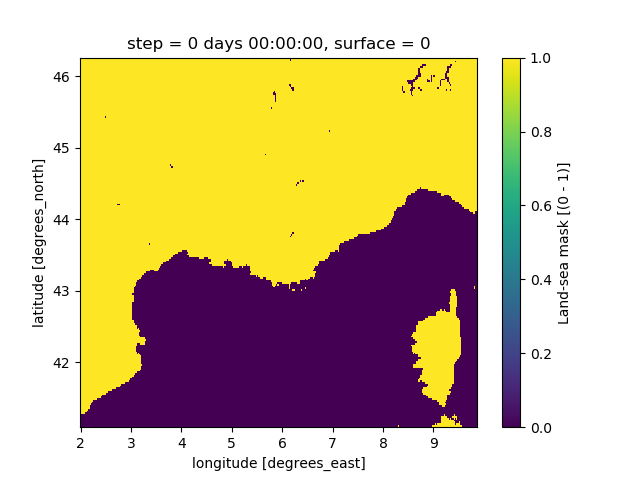

<IPython.core.display.Javascript object>


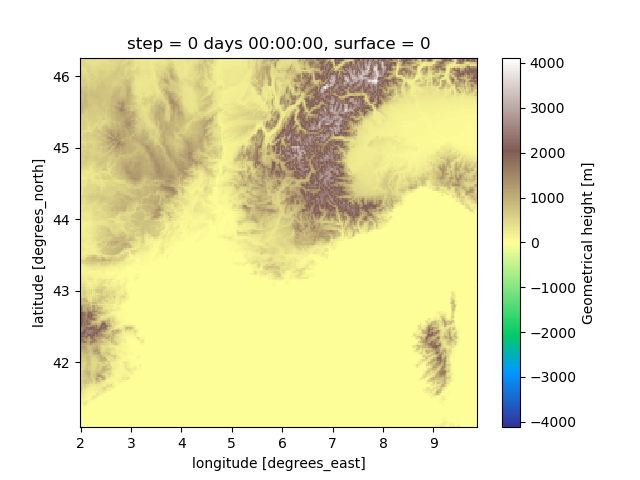

In [10]:
plt.figure()
data["lsm"].plot() # Plotting land sea mask. 
plt.figure()
data["p3008"].plot(cmap='terrain') # Plotting Altitude 

## Exploring the grid data format or how to get information
Overview of the data -> print(data) to get the metadata : 

In [23]:
print(data)

<xarray.Dataset>
Dimensions:    (latitude: 207, longitude: 315)
Coordinates:
    step       timedelta64[ns] ...
    surface    int32 ...
  * latitude   (latitude) float64 46.25 46.23 46.2 46.18 ... 41.15 41.13 41.1
  * longitude  (longitude) float64 2.0 2.025 2.05 2.075 ... 9.775 9.8 9.825 9.85
Data variables:
    lsm        (latitude, longitude) float32 ...
    p3008      (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             lfpw
    GRIB_centreDescription:  French Weather Service - Toulouse
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             French Weather Service - Toulouse
    history:                 2019-10-30T11:36:21 GRIB to CDM+CF via cfgrib-0....


Get the information about coordinates (latitude and longitude):

In [24]:
coord = 'longitude'
data[coord]
vals = data[coord].values  #get the values
print(data[coord])

<xarray.DataArray 'longitude' (longitude: 315)>
array([2.   , 2.025, 2.05 , ..., 9.8  , 9.825, 9.85 ])
Coordinates:
    step       timedelta64[ns] ...
    surface    int32 ...
  * longitude  (longitude) float64 2.0 2.025 2.05 2.075 ... 9.775 9.8 9.825 9.85
Attributes:
    units:          degrees_east
    standard_name:  longitude
    long_name:      longitude


In [25]:
print(data[coord].units)  #example to get the information from attributes

degrees_east


In [26]:
vals

array([2.   , 2.025, 2.05 , 2.075, 2.1  , 2.125, 2.15 , 2.175, 2.2  ,
       2.225, 2.25 , 2.275, 2.3  , 2.325, 2.35 , 2.375, 2.4  , 2.425,
       2.45 , 2.475, 2.5  , 2.525, 2.55 , 2.575, 2.6  , 2.625, 2.65 ,
       2.675, 2.7  , 2.725, 2.75 , 2.775, 2.8  , 2.825, 2.85 , 2.875,
       2.9  , 2.925, 2.95 , 2.975, 3.   , 3.025, 3.05 , 3.075, 3.1  ,
       3.125, 3.15 , 3.175, 3.2  , 3.225, 3.25 , 3.275, 3.3  , 3.325,
       3.35 , 3.375, 3.4  , 3.425, 3.45 , 3.475, 3.5  , 3.525, 3.55 ,
       3.575, 3.6  , 3.625, 3.65 , 3.675, 3.7  , 3.725, 3.75 , 3.775,
       3.8  , 3.825, 3.85 , 3.875, 3.9  , 3.925, 3.95 , 3.975, 4.   ,
       4.025, 4.05 , 4.075, 4.1  , 4.125, 4.15 , 4.175, 4.2  , 4.225,
       4.25 , 4.275, 4.3  , 4.325, 4.35 , 4.375, 4.4  , 4.425, 4.45 ,
       4.475, 4.5  , 4.525, 4.55 , 4.575, 4.6  , 4.625, 4.65 , 4.675,
       4.7  , 4.725, 4.75 , 4.775, 4.8  , 4.825, 4.85 , 4.875, 4.9  ,
       4.925, 4.95 , 4.975, 5.   , 5.025, 5.05 , 5.075, 5.1  , 5.125,
       5.15 , 5.175,

Example for the land-sea mask:

In [27]:
lsm=data['lsm']
lsm_vals=data['lsm'].values     #get the values
#lsm.units                      #example to the information from attributes
lsm

<xarray.DataArray 'lsm' (latitude: 207, longitude: 315)>
array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
    step       timedelta64[ns] ...
    surface    int32 ...
  * latitude   (latitude) float64 46.25 46.23 46.2 46.18 ... 41.15 41.13 41.1
  * longitude  (longitude) float64 2.0 2.025 2.05 2.075 ... 9.775 9.8 9.825 9.85
Attributes:
    GRIB_paramId:                             172
    GRIB_shortName:                           lsm
    GRIB_units:                               (0 - 1)
    GRIB_name:                                Land-sea mask
    GRIB_cfName:                              land_binary_mask
    GRIB_cfVarName:                           lsm
    GRIB_missingValue:                        9999
    GRIB_numberOfPoints:                      65205
    GRIB_type

## Nice plot using basemap 

<IPython.core.display.Javascript object>


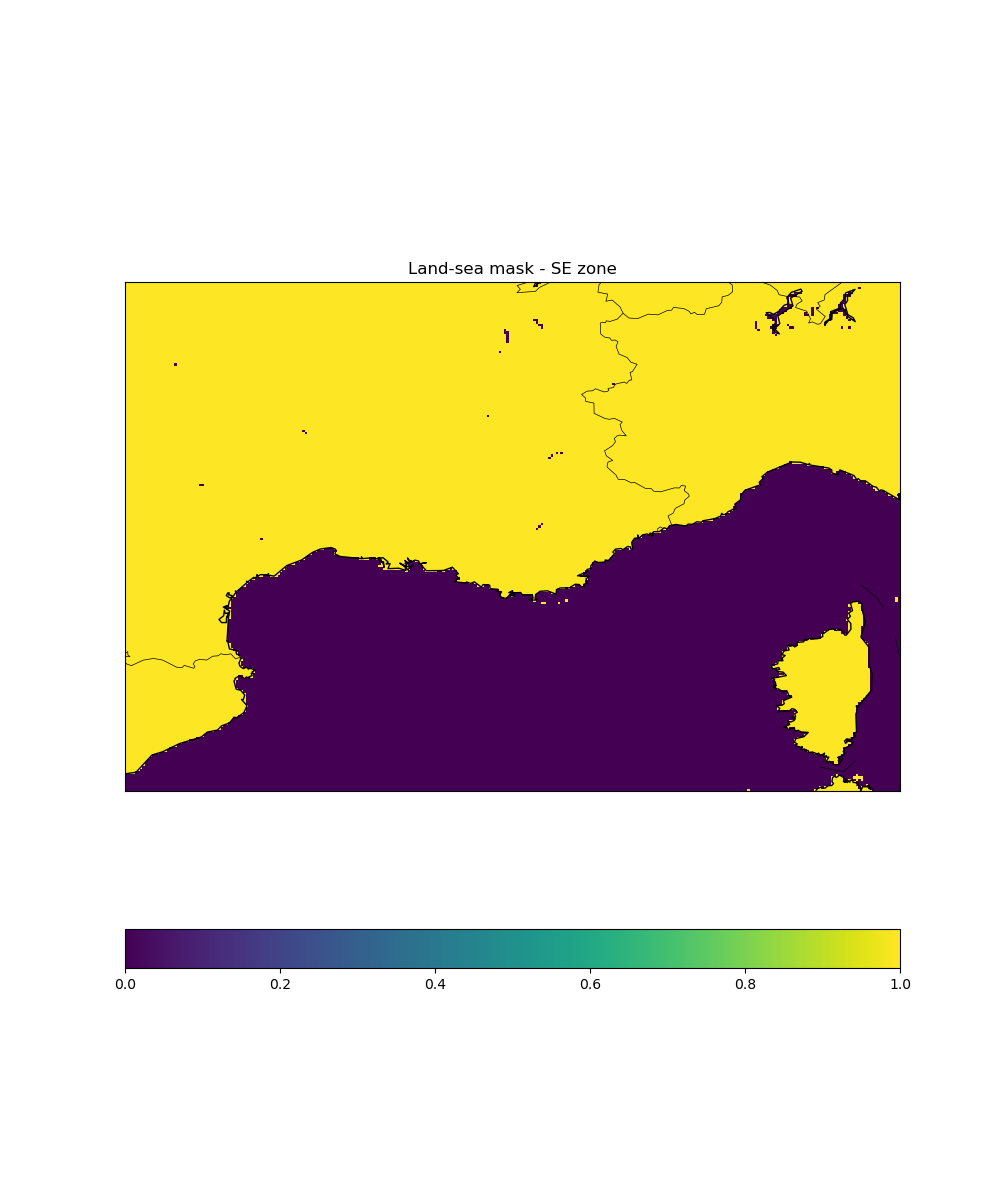

C:\Users\larvorg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
C:\Users\larvorg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':


In [29]:
fig,ax=plt.subplots(1,1,figsize=(10,12))

#background map definition : coordinates of corners, resolution, projection type
m = Basemap(epsg=n_epsg,resolution='i', # You can change the resolution of the contours here
            llcrnrlat=lllat,
                  urcrnrlat=urlat,
                  llcrnrlon=lllon,
                  urcrnrlon=urlon)

#plot the data and the background map (coastlines and borders)
m.drawcoastlines()
m.drawcountries()
img=m.imshow(lsm_vals, interpolation='none', origin='upper')
plt.colorbar(img, orientation= 'horizontal').set_label('')
plt.title("Land-sea mask - "+ zone + " zone")
plt.show()

Example for the relief mask:

In [6]:
r=data['p3008']
r_vals=data['p3008'].values     #get the values
#r.units                      #example to the information from attributes
r

<xarray.DataArray 'p3008' (latitude: 207, longitude: 315)>
array([[ 4.899793e+02,  4.367430e+02,  4.254930e+02, ...,  2.272292e+03,
         1.728229e+03,  1.133431e+03],
       [ 4.751805e+02,  4.978890e+02,  4.810555e+02, ...,  2.198521e+03,
         1.910465e+03,  1.318243e+03],
       [ 4.708123e+02,  5.029095e+02,  5.162015e+02, ...,  1.627778e+03,
         1.954139e+03,  1.506958e+03],
       ...,
       [-1.678467e-04, -1.678467e-04, -1.678467e-04, ..., -1.678467e-04,
        -1.678467e-04, -1.678467e-04],
       [-1.678467e-04, -1.678467e-04, -1.678467e-04, ..., -1.678467e-04,
        -1.678467e-04, -1.678467e-04],
       [-1.678467e-04, -1.678467e-04, -1.678467e-04, ..., -1.678467e-04,
        -1.678467e-04, -1.678467e-04]], dtype=float32)
Coordinates:
    step       timedelta64[ns] ...
    surface    int32 ...
  * latitude   (latitude) float64 46.25 46.23 46.2 46.18 ... 41.15 41.13 41.1
  * longitude  (longitude) float64 2.0 2.025 2.05 2.075 ... 9.775 9.8 9.825 9.85
Attribute

<IPython.core.display.Javascript object>


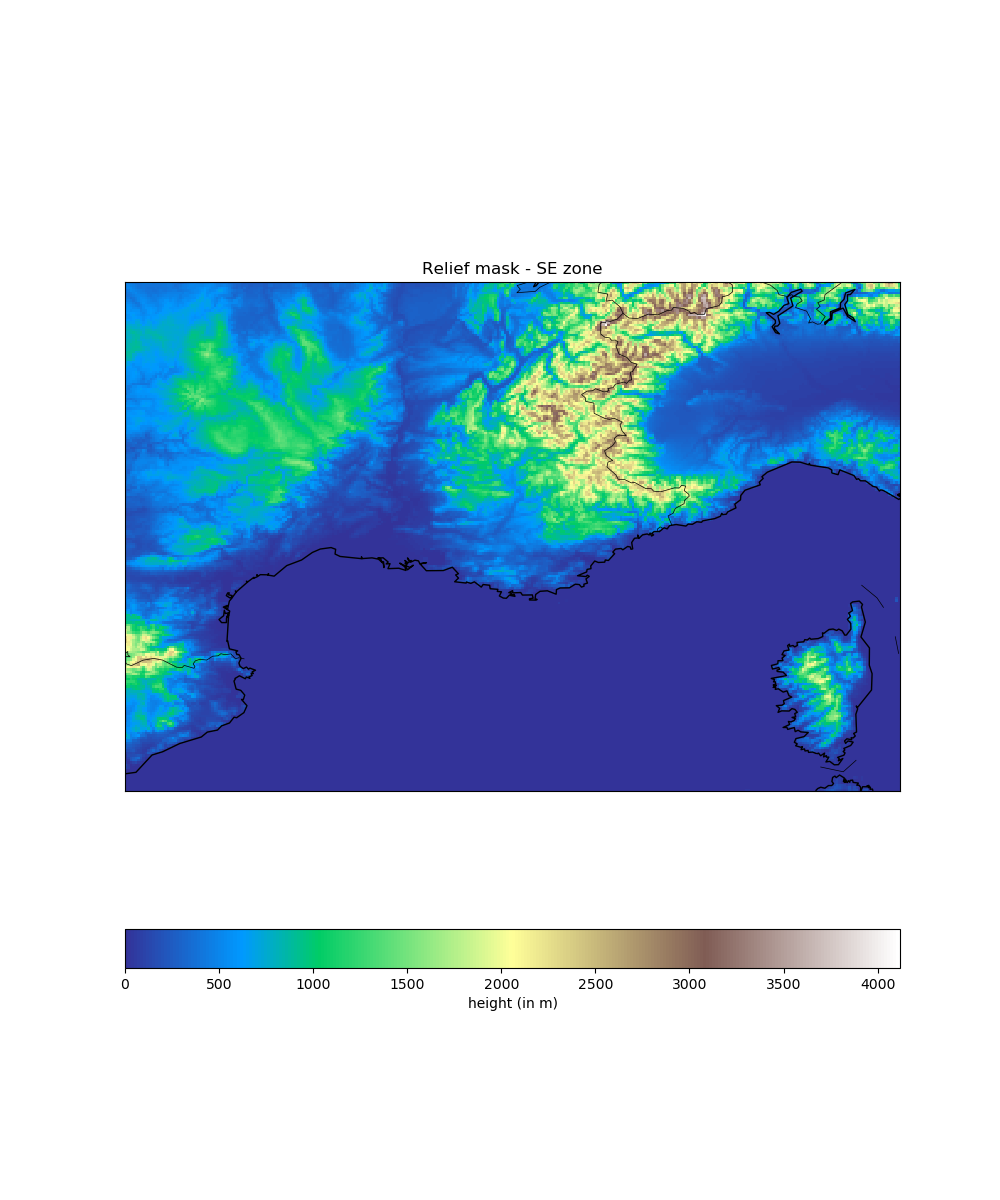

C:\Users\larvorg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
C:\Users\larvorg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':


In [9]:
fig,ax=plt.subplots(1,1,figsize=(10,12))

#background map definition : coordinates of corners, resolution, projection type
m = Basemap(epsg=n_epsg,resolution='i',  # You can change the resolution of the contours here
            llcrnrlat=lllat,
                  urcrnrlat=urlat,
                  llcrnrlon=lllon,
                  urcrnrlon=urlon)

#plot the data and the background map (coastlines and borders)
m.drawcoastlines()
m.drawcountries()
img=m.imshow(r_vals, interpolation='none', origin='upper',cmap='terrain')
plt.colorbar(img, orientation= 'horizontal').set_label('height (in m)')
plt.title("Relief mask - "+ zone + " zone")
plt.show()